In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive

drive.mount('/content/drive')
data_path = '/content/drive/My Drive/CTI Milestone 2 (Final)/'

data = pd.read_csv(data_path + "/walmart-post-comments.csv", sep=';')
comments = data["message"]
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,path,id,parent_id,level,object_id,object_type,query_status,query_time,query_type,name,message
0,159616034235_10158536281979236,2,1,1,159616034235_10158536281979236,data,fetched (200),2020-04-25 15:29:36.898237,Facebook:<page>/posts,NaN,Our truck drivers really are amazing. They’re ...
1,159616034235_10158536281979236/101585362819792...,392,2,2,10158536281979236_10158536360904236,data,fetched (200),2020-04-25 15:31:48.148113,Facebook:<post>/comments,NaN,Thank you to truck drivers! I just wish Walmar...
2,159616034235_10158536281979236/101585362819792...,393,2,2,10158536281979236_10158536305859236,data,fetched (200),2020-04-25 15:31:48.148113,Facebook:<post>/comments,NaN,"Thank you so much for your hard work, I am sor..."
3,159616034235_10158536281979236/101585362819792...,394,2,2,10158536281979236_113346930131910,data,fetched (200),2020-04-25 15:31:48.148113,Facebook:<post>/comments,NaN,Yes they are! I'm also thankful for those who...
4,159616034235_10158536281979236/101585362819792...,395,2,2,10158536281979236_10158536319024236,data,fetched (200),2020-04-25 15:31:48.148113,Facebook:<post>/comments,NaN,"I don’t personally know any truck drivers, but..."


In [7]:
comments

0        Our truck drivers really are amazing. They’re ...
1        Thank you to truck drivers! I just wish Walmar...
2        Thank you so much for your hard work, I am sor...
3        Yes they are!  I'm also thankful for those who...
4        I don’t personally know any truck drivers, but...
                               ...                        
64655                             Love the blue one lol...
64656                                     Thats alot of bs
64657                                       Wal-Mart sucks
64658                                    Rock that blazer!
64659                                                  NaN
Name: message, Length: 64660, dtype: object

In [8]:
data.message.str.split(expand=True).stack().value_counts()

the                41298
to                 40323
and                32750
I                  32263
a                  25302
                   ...  
Nestick                1
Vernal                 1
3599                   1
megustas               1
anything.Crowed        1
Length: 83791, dtype: int64

In [0]:
indexNames = data[data['level'] == 1].index
 
# Delete these row indexes from dataFrame
data.drop(indexNames, inplace=True)

In [10]:
data['COUNT'] = data.message.str.count('attack')
data.COUNT = data.COUNT.dropna()
no_word = data.COUNT.value_counts()[0]
no_word

60174

In [11]:
length = len(data.COUNT)
length

64271

In [12]:
posts_with_word = length - no_word
posts_with_word - 4050

47

In [13]:
data['COUNT2'] = data.message.str.count('downfall')
no_word2 = data.COUNT2.value_counts()[0]
posts_with_word2 = length - no_word2
posts_with_word2 - 4050

3

In [14]:
data['COUNT3'] = data.message.str.count('malware')
no_word3 = data.COUNT3.value_counts()[0]
posts_with_word3 = length - no_word3
posts_with_word3 - 4050

0

In [15]:
data['COUNT4'] = data.message.str.count('awful')
no_word4 = data.COUNT4.value_counts()[0]
posts_with_word4 = length - no_word4
posts_with_word4 - 4050

107

In [16]:
data['COUNT5'] = data.message.str.count('hack')
no_word5 = data.COUNT5.value_counts()[0]
posts_with_word5 = length - no_word5
posts_with_word5 - 4050

70

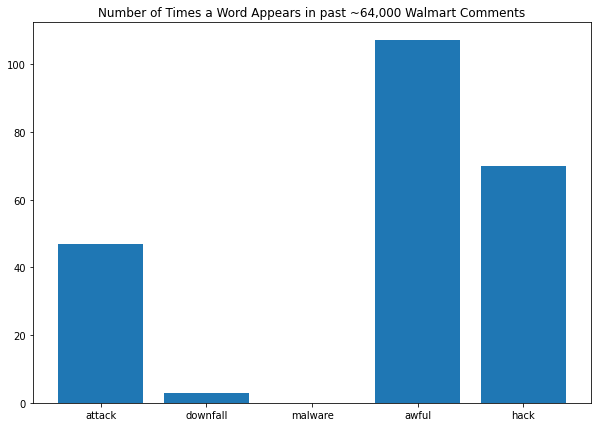

In [17]:
import matplotlib.pyplot as plt

nums = [posts_with_word - 4050, posts_with_word2 - 4050, posts_with_word3 - 4050, posts_with_word4 - 4050, posts_with_word5 - 4050]

LABELS = ["attack", "downfall", "malware", "awful", "hack"]
x = np.arange(5)

fig, ax = plt.subplots()
plt.bar(x, nums)
fig.set_size_inches(10, 7)
plt.xticks(x, ("attack", "downfall", "malware", "awful", "hack"))
plt.title('Number of Times a Word Appears in past ~64,000 Walmart Comments')
plt.show()